In [ ]:
# Copyright 2021 IITK EE604A Image Processing. All Rights Reserved.
# 
# Licensed under the MIT License. Use and/or modification of this code outside of EE604 must reference:
#
# © IITK EE604A Image Processing 
#
# Author: Dheeraj Bharti, Chiranjeev Prachand and Prof K. S. Venkatesh, Department of Electrical Engineering, IIT Kanpur

Question 4.

This question consists of two parts:<br>
  1) swapping of the three R, G, B channels<br>
  2) image rotation and translation

In [7]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt


In [5]:
def rgb_swap(img):
  '''
  write a program which creates three images with RGB channels swapped in each of the image. let the original image be BGR then the second and the third 
  output images should be RBG and GRB respectively. 

  Inputs:
  - img - nparray

  Outputs: 
  - out_im1 - numpy array (of dtype np.uint8) containing the output image in BGR.
  - out_im2 - numpy array (of dtype np.uint8) containing the output image in RBG.
  - out_im3 - numpy array (of dtype np.uint8) containing the output image in GRB. 

  Allowed external package:
  You are not allowed to use any direct implementations 
  '''

  out_im1 = img 
  rows = out_im1.shape[0]
  cols = out_im1.shape[1]

  out_im2 = np.zeros((rows, cols, 3), dtype=np.uint8)  
  out_im3 = np.zeros((rows, cols, 3), dtype=np.uint8) 

  out_im2[:, :, 0] = out_im1[:, :, 2]
  out_im2[:, :, 1] = out_im1[:, :, 0]
  out_im2[:, :, 2] = out_im1[:, :, 1]

  out_im3[:, :, 0] = out_im1[:, :, 1]
  out_im3[:, :, 1] = out_im1[:, :, 2]
  out_im3[:, :, 2] = out_im1[:, :, 0]

  return [out_im1, out_im2, out_im3]



<Figure size 432x288 with 0 Axes>

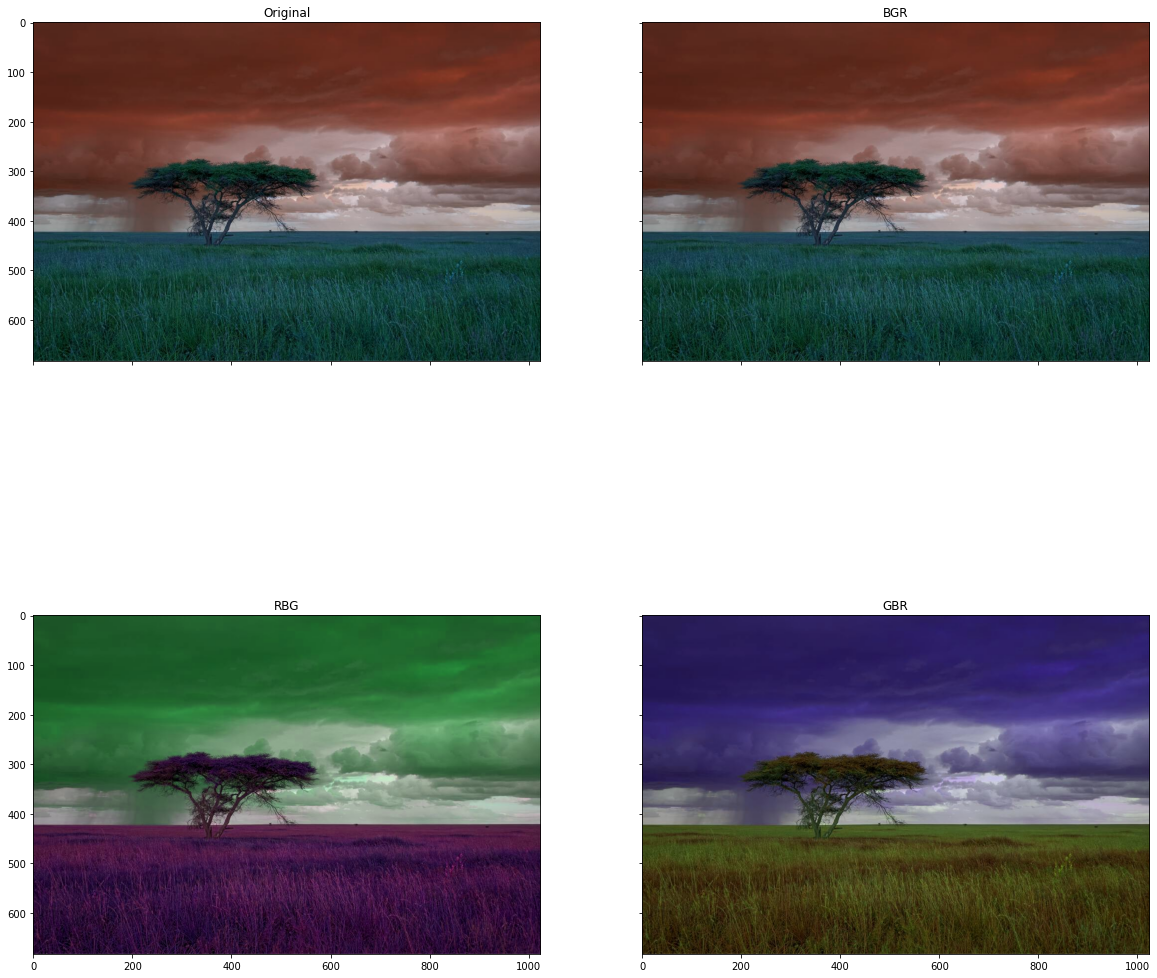

In [8]:
## Test run

## Write a script which runs the above function for the given image and plot the different images in a pyplot subplot observing the changes.
#im = cv2.imread('q2im1.jpg')
img = 'q2im1.jpg'
im = cv2.imread(img)

[out_im1, out_im2, out_im3] = rgb_swap(im)
#cv2_imshow(out_im1)
#cv2_imshow(out_im2)
#cv2_imshow(out_im3)


plt.figure()

#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(2,2, figsize=(20,20)) 

axarr[0, 0].imshow(im)
axarr[0, 0].set_title('Original')
axarr[0, 1].imshow(out_im1)
axarr[0, 1].set_title('BGR')
axarr[1, 0].imshow(out_im2)
axarr[1, 0].set_title('RBG')
axarr[1, 1].imshow(out_im3)
axarr[1, 1].set_title('GBR')

for ax in axarr.flat:
    ax.label_outer()






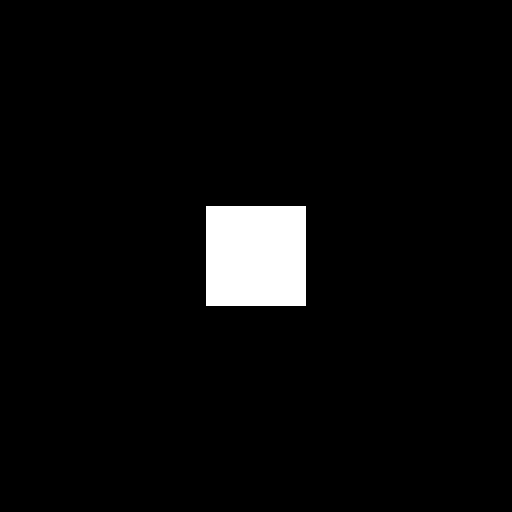

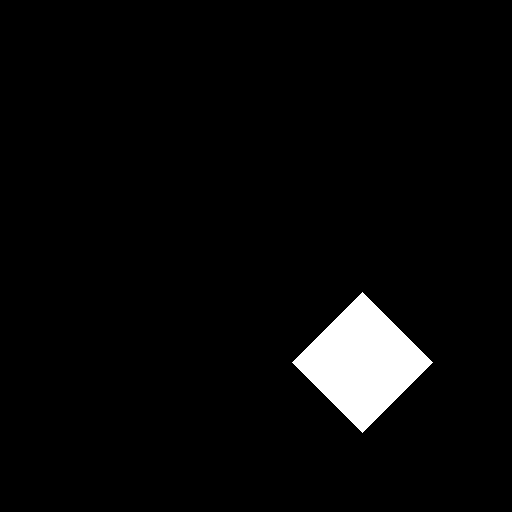

In [10]:
import math
img_size = 512
square_len = 100

img = np.zeros((img_size, img_size), dtype=np.uint8) # Intialise with blank display
for i in range(math.floor(img_size/2 - square_len/2), math.floor(img_size/2 + square_len/2)):
  for j in range(math.floor(img_size/2 - square_len/2), math.floor(img_size/2 + square_len/2)):
    img[i,j] = 255
cv2_imshow(img)



def transform_image(img, shift, theta):
  '''
  write a program which translate and rotates a white square of size 100x100 pixels. First create an image of size 512x512 pixels having black background 
  and a square of size 100x100 in the center of the image. now write a code which shifts the square by given pixel value and rotates it counter clockwise by 
  given angle theta.

  Inputs:
  - img - original image
  - shift - a 2x1 array having the pixel shift value in x direction and y direction
  - theta - angle of roatation in degrees in counter clockwise direction

  Outputs: 
  - out_im - numpy array (of dtype np.uint8) containing the output image.

  Allowed external package:
  You are not allowed to use any direct implementations 
  '''

  img_size = img.shape[0]
  square_len = 100  

  
  out_img = img
  out_img = img.astype(np.float32) - 255
  root2 = np.sqrt(2)
  '''
  # Translation (just for translation)

  for i in range(math.floor(img_size/2 + shift[0,0]  - square_len/2),(math.floor(img_size/2 + shift[0,0] - square_len/2) + 100)):
    for j in range(math.floor(img_size/2 + shift[1,0] - square_len/2), (math.floor(img_size/2 + shift[1,0] - square_len/2) +100)):
      out_img[i,j] += 500
  
  for m in range(img.shape[0]):
    for n in range(img.shape[0]):
      if out_img[m,n] < 200:
        out_img[m,n] = 0
      else:
        out_img[m,n] = 255
  '''
  # Rotation
  sh_centre = np.array([img_size/2 + shift[0,0] , img_size/2 + shift[1,0]])
  bot_left = np.array([sh_centre[0] + (square_len/2) * root2 * np.sin(np.radians(45+theta)), sh_centre[1] - (square_len/2) * root2 * np.cos(np.radians(45+theta))])
  bot_right = np.array([sh_centre[0] + (square_len/2) * root2 * np.sin(np.radians(135+theta)), sh_centre[1] - (square_len/2) * root2 * np.cos(np.radians(135+theta))])

  top_right = np.array([sh_centre[0] - (square_len/2) * root2 * np.sin(np.radians(45+theta)), sh_centre[1] + (square_len/2) * root2 * np.cos(np.radians(45+theta))])
  top_left = np.array([sh_centre[0] - (square_len/2) * root2 * np.sin(np.radians(135+theta)), sh_centre[1] + (square_len/2) * root2 * np.cos(np.radians(135+theta))])

  s1 = np.sign((sh_centre[1] - bot_left[1]) * (bot_right[0] - bot_left[0]) - (bot_right[1] - bot_left[1]) * (sh_centre[0] - bot_left[0]))
  s2 = np.sign((sh_centre[1] - bot_right[1]) * (top_right[0] - bot_right[0]) - (top_right[1] - bot_right[1]) * (sh_centre[0] - bot_right[0]))
  s3 = np.sign((sh_centre[1] - top_right[1]) * (top_left[0] - top_right[0]) - (top_left[1] - top_right[1]) * (sh_centre[0] - top_right[0]))
  s4 = np.sign((sh_centre[1] - top_left[1]) * (bot_left[0] - top_left[0]) - (bot_left[1] - top_left[1]) * (sh_centre[0] - top_left[0]))

  for k in range(img.shape[0]):
    for l in range(img.shape[0]): 
      if np.sign((l - bot_left[1]) * (bot_right[0] - bot_left[0]) - (bot_right[1] - bot_left[1]) * (k - bot_left[0])) == s1:
        if np.sign((l - bot_right[1]) * (top_right[0] - bot_right[0]) - (top_right[1] - bot_right[1]) * (k - bot_right[0])) == s2:
          if np.sign((l - top_right[1]) * (top_left[0] - top_right[0]) - (top_left[1] - top_right[1]) * (k - top_right[0])) == s3:
            if np.sign((l - top_left[1]) * (bot_left[0] - top_left[0]) - (bot_left[1] - top_left[1]) * (k - top_left[0])) == s4:
              out_img[k,l] += 500

  for m in range(img.shape[0]):
    for n in range(img.shape[0]):
      if out_img[m,n] < 200:
        out_img[m,n] = 0
      else:
        out_img[m,n] = 255

  return np.uint8(out_img)

out_img = transform_image(img, np.array([[106],[106]]), 135)
cv2_imshow(out_img)


<Figure size 432x288 with 0 Axes>

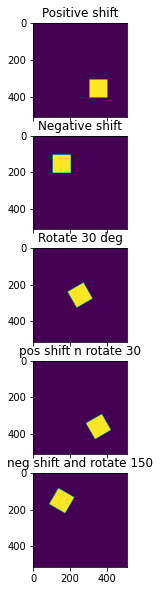

In [15]:
# Write a script which tests your function for atleast 5 different combinations of rotation and translation


out_img1 = transform_image(img, np.array([[100],[100]]), 0)

out_img2 = transform_image(img, np.array([[-100],[-100]]), 0)

out_img3 = transform_image(img, np.array([[0],[0]]), 30)

out_img4 = transform_image(img, np.array([[106],[100]]), 30)

out_img5 = transform_image(img, np.array([[-106],[-100]]), 150)

plt.figure()


f, axarr = plt.subplots(5,1, figsize=(50,10)) 

axarr[0].imshow(out_img1)
axarr[0].set_title('Positive shift')
axarr[1].imshow(out_img2)
axarr[1].set_title('Negative shift')
axarr[2].imshow(out_img3)
axarr[2].set_title('Rotate 30 deg')
axarr[3].imshow(out_img4)
axarr[3].set_title('pos shift n rotate 30')
axarr[4].imshow(out_img5)
axarr[4].set_title('neg shift and rotate 150')

for ax in axarr.flat:
    ax.label_outer()



In [ ]:

out_img = transform_image(img, np.array([[100],[100]]), 0)
cv2_imshow(out_img)

out_img = transform_image(img, np.array([[-100],[-100]]), 0)
cv2_imshow(out_img)

out_img = transform_image(img, np.array([[0],[0]]), 30)
cv2_imshow(out_img)

out_img = transform_image(img, np.array([[106],[100]]), 30)
cv2_imshow(out_img)

out_img = transform_image(img, np.array([[-106],[-100]]), 150)
cv2_imshow(out_img)